 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [181]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, infer_datetime_format=True, parse_dates=True, index_col='Date')
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_path, infer_datetime_format=True, parse_dates=True, index_col='Date')
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_path, infer_datetime_format=True, parse_dates=True, index_col='Date')
sp500_returns.sort_index(inplace=True)

In [12]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '')
sp500_returns['Close'] = sp500_returns['Close'].astype('float')
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Calculate Daily Returns
sp500_returns = sp500_returns.pct_change()
sp500_returns.isnull().sum()

Close    1
dtype: int64

In [15]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close': 'SP500_Daily_Returns'}, inplace=True)
sp500_returns.head()

,SP500_Daily_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [131]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

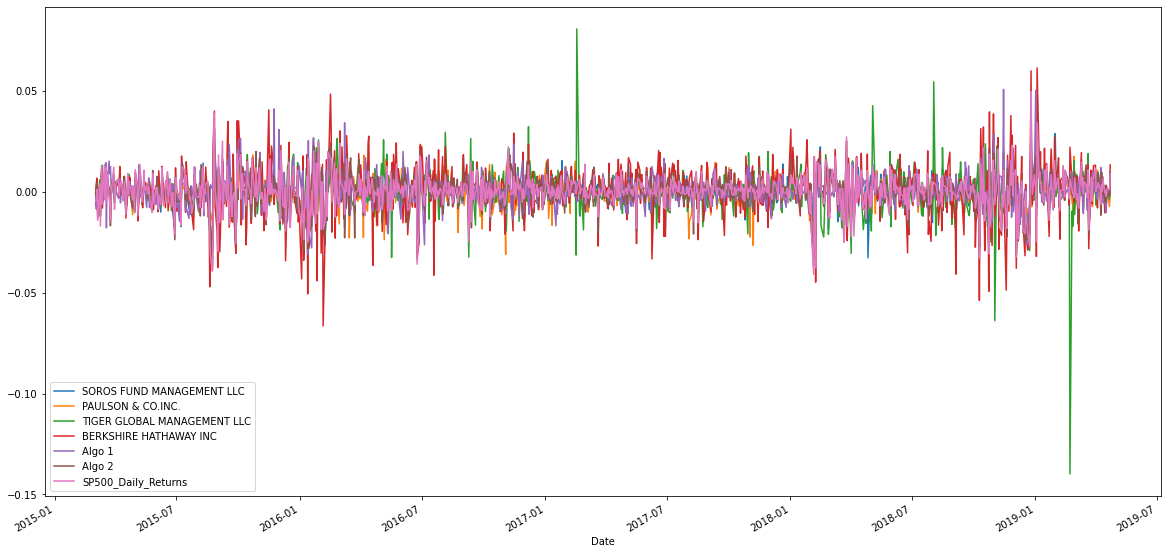

In [18]:
# Plot daily returns of all portfolios
all_portfolio_returns.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

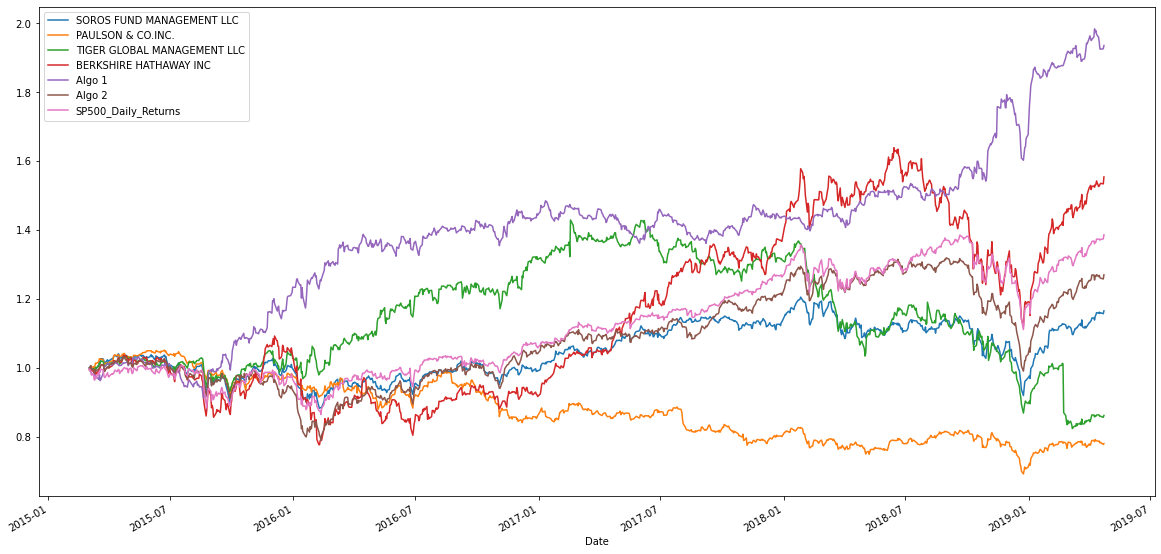

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [156]:
# Box plot to visually show risk

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_portfolio_returns.std()
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500_Daily_Returns            0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Determine which portfolios are riskier than the S&P 500
# Berkshire Hathaway and Tiger Global Management are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500_Daily_Returns            0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

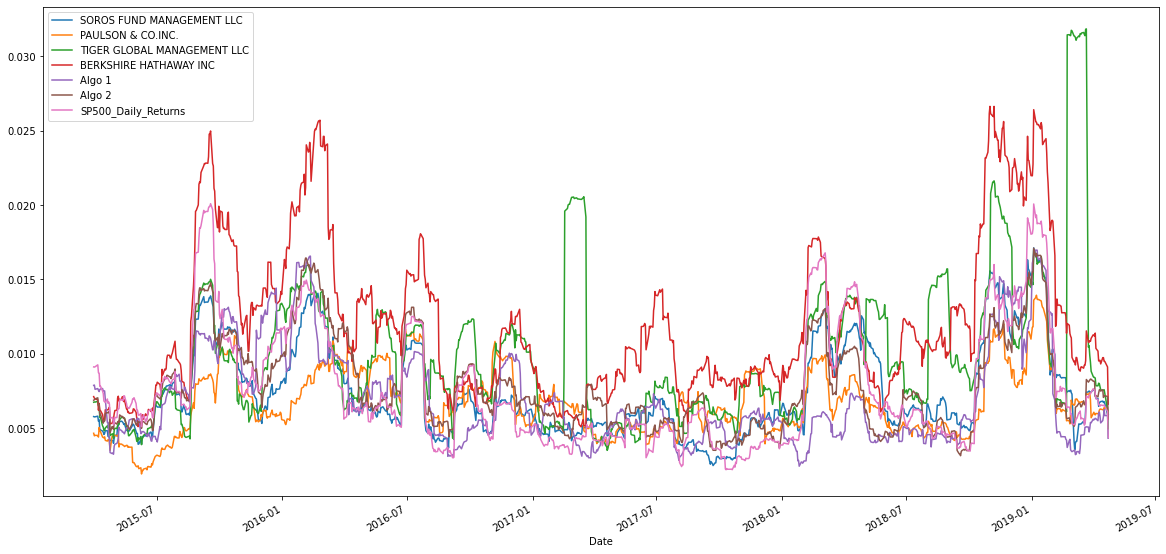

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = all_portfolio_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Daily_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio
covariance = all_portfolio_returns['Algo 1'].cov(all_portfolio_returns['SP500_Daily_Returns'])
covariance

1.8217749991632826e-05

In [30]:
# Calculate variance of S&P 500
variance = all_portfolio_returns['SP500_Daily_Returns'].var()
variance

7.316632424648712e-05

In [32]:
# Computing beta
algo_1_beta = covariance / variance
algo_1_beta

0.24899091459425748

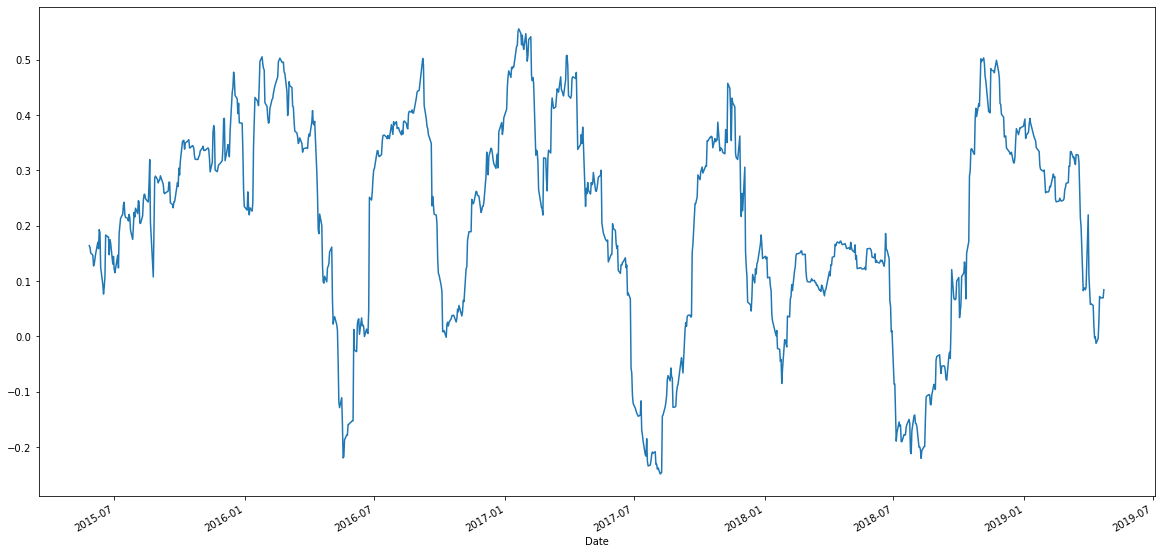

In [36]:
# Plot 60-day beta trend
rolling_covariance = all_portfolio_returns['Algo 1'].rolling(window=60).cov(all_portfolio_returns['SP500_Daily_Returns'])
rolling_variance = all_portfolio_returns['SP500_Daily_Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [41]:
# Use `ewm` to calculate the rolling window
all_portfolio_returns.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))

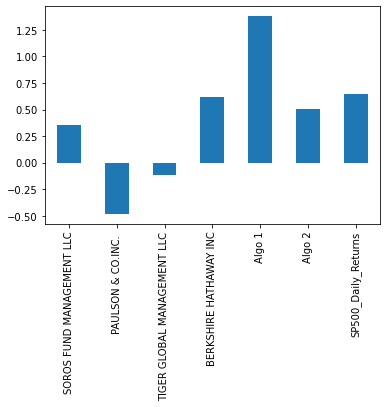

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 strategy outperformed all other portfolios. Algo 2 did not outperform the S&P 500 or Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [100]:
# Reading data from 1st stock
goog_path = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [101]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [102]:
# Reading data from 3rd stock
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [103]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([goog_df, aapl_df, cost_df])
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [104]:
# Reset Date index
all_stocks.sort_index(ascending=True, inplace=True)
all_stocks

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-14,GOOG,1100.20
2018-05-14,AAPL,188.15
...,...,...
2019-05-08,AAPL,202.90
2019-05-08,GOOG,1166.27
2019-05-09,COST,243.47


In [109]:
# Reorganize portfolio data by having a column per symbol
all_stocks = all_stocks.pivot(columns='Symbol', values='NOCP')
all_stocks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [113]:
# Calculate daily returns
daily_returns = all_stocks.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.sample(5)

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2019-03-04,0.005029,-0.004694,0.005969
2018-08-08,0.000676,0.003216,0.002729
2019-02-04,0.028405,0.004328,0.019851
2018-08-17,0.019970,0.011156,-0.004584
2018-10-08,-0.002318,0.023353,-0.007241


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [163]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [172]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([all_portfolio_returns, portfolio_returns], axis='columns')
combined_df.rename(columns={0: 'Custom Portfolio'}, inplace=True)

In [173]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [174]:
# Calculate the annualized `std`
daily_std_new = combined_df.std()
annualized_std_new = daily_std_new * np.sqrt(252)
annualized_std_new.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
Custom Portfolio               0.211496
SP500_Daily_Returns            0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

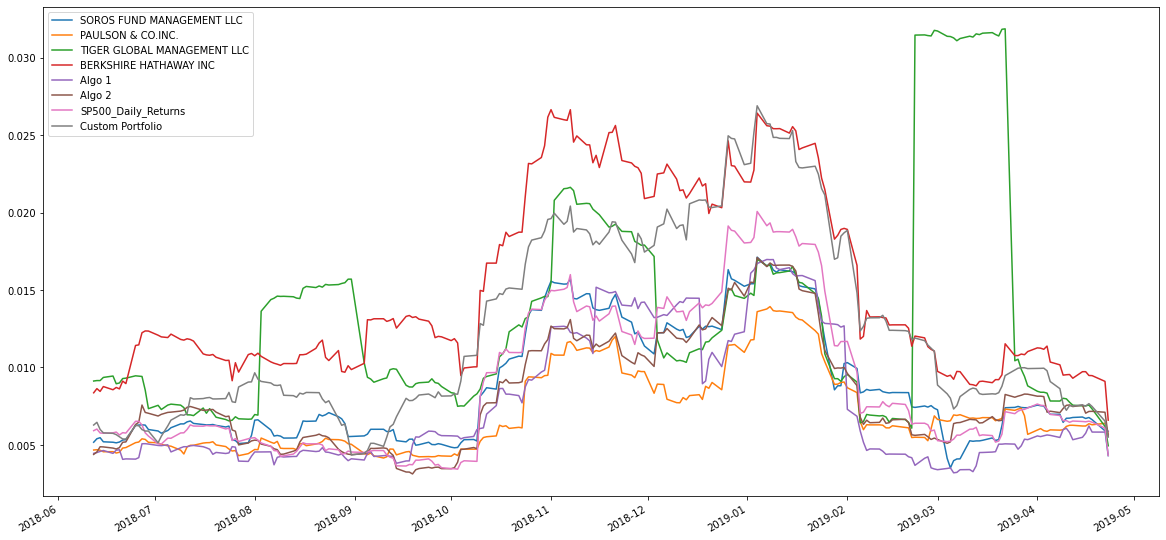

In [176]:
# Calculate rolling standard deviation
rolling_std_21 = combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21.plot(figsize=(20, 10))

### Calculate and plot the correlation

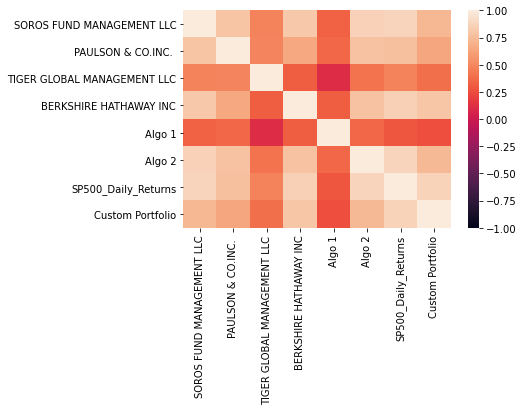

In [185]:
# Calculate and plot the correlation
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

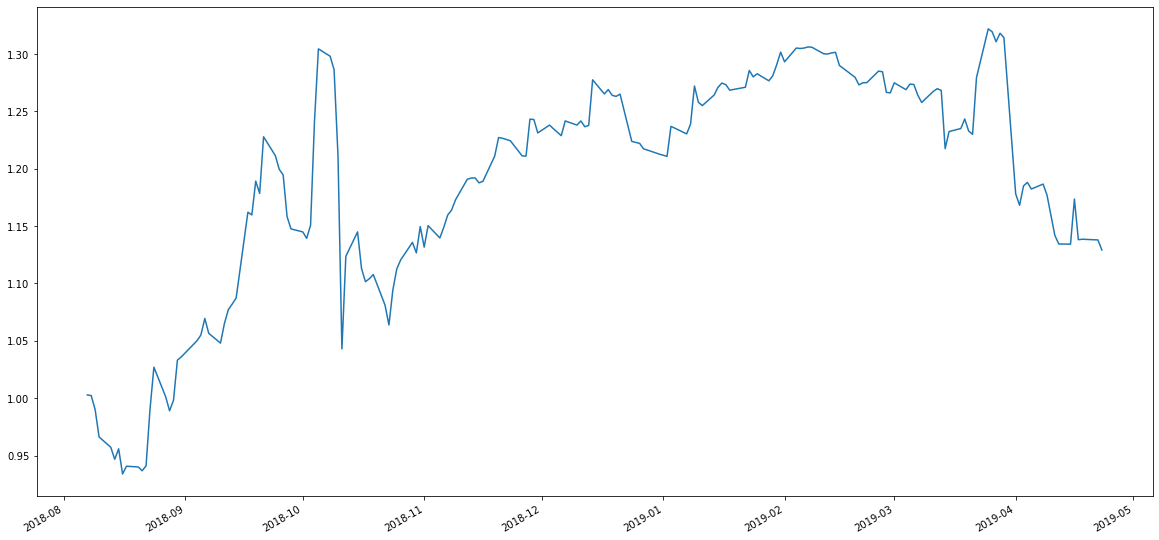

In [186]:
# Calculate and plot Beta
rolling_covariance = combined_df['Custom Portfolio'].rolling(window=60).cov(combined_df['SP500_Daily_Returns'])
rolling_variance = combined_df['SP500_Daily_Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [187]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_new = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

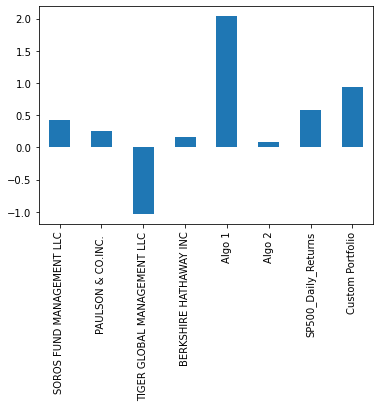

In [188]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [190]:
# Second best performing portfolio behind 'Algo 1'.